In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [110]:
def indicator_preprocessing():
    """
    This function is to preprocess 1980-1981 WEO Economic Indicator dataset.
    Return: a merged dataset containing 1980-1981 Economic Indicator data.
    """
    s_year = xrange(1980, 1982)
    #load 1980-1981 indicator data into a dictionary
    try:
        dfs = {year:pd.read_csv("stats_"+str(year)+".csv") for year in s_year}
    except:
        print('Data Not Found!')
    for year in s_year:
        dfs[year]['Economic Group'].fillna('N', inplace=True)
        dfs[year] = dfs[year].set_index(['Country','Economic Group','Country Group'])
    
    return pd.concat(dfs, axis=1, join='outer') #merge 1980-1981 dataframes into a dataframe

indicator_preprocessing().head()

1980                       \
                                                    BCA  GGR GGSB GGX GGXWDG   
Country             Economic Group Country Group                               
Afghanistan         MENA           EME              NaN  NaN  NaN NaN    NaN   
Albania             EDE            EME            0.001  NaN  NaN NaN    NaN   
Algeria             MENA           EME            0.242  NaN  NaN NaN    NaN   
Angola              SSA            EME            0.070  NaN  NaN NaN    NaN   
Antigua and Barbuda LAC            EME           -0.019  NaN  NaN NaN    NaN   

                                                                             \
                                                 GGXWDN  LE      LP     LUR   
Country             Economic Group Country Group                              
Afghanistan         MENA           EME              NaN NaN     NaN     NaN   
Albania             EDE            EME              NaN NaN   2.762   5.028   
Algeria             MENA           EME              NaN NaN  18.666  15.789   
Angola              SSA            EME              NaN NaN   8.388     NaN   
Antigua and Barbuda LAC            EME              NaN NaN   0.068     NaN   

                                                              ...   1981  \
                                                 NGAP_NPGDP   ...     LE   
Country             Economic Group Country Group              ...          
Afghanistan         MENA           EME                  NaN   ...    NaN   
Albania             EDE            EME                  NaN   ...    NaN   
Algeria             MENA           EME                  NaN   ...    NaN   
Angola              SSA            EME                  NaN   ...    NaN   
Antigua and Barbuda LAC            EME                  NaN   ...    NaN   

                                                                             \
                                                      LP     LUR NGAP_NPGDP   
Country             Economic Group Country Group                              
Afghanistan         MENA           EME               NaN     NaN        NaN   
Albania             EDE            EME             2.817   4.224        NaN   
Algeria             MENA           EME            19.246  15.385        NaN   
Angola              SSA            EME             8.615     NaN        NaN   
Antigua and Barbuda LAC            EME             0.068     NaN        NaN   

                                                                        \
                                                    NGDP_R     NGDPRPC   
Country             Economic Group Country Group                         
Afghanistan         MENA           EME                 NaN         NaN   
Albania             EDE            EME             341.131  121089.916   
Algeria             MENA           EME            2674.259  138951.430   
Angola              SSA            EME             323.488   37550.337   
Antigua and Barbuda LAC            EME               0.872   12841.831   

                                                                             \
                                                 NGSD_NGDP NID_NGDP   PCPIE   
Country             Economic Group Country Group                              
Afghanistan         MENA           EME                 NaN      NaN     NaN   
Albania             EDE            EME              38.467   43.074     NaN   
Algeria             MENA           EME              28.024   30.830   7.009   
Angola              SSA            EME              16.900   19.342     NaN   
Antigua and Barbuda LAC            EME               9.181      NaN  63.183   

                                                          
                                                 TX_RPCH  
Country             Economic Group Country Group          
Afghanistan         MENA           EME               NaN  
Albania             EDE            EME                 0  
Algeria       

In [137]:
def specific_indicator_preprocessing_by_year(indc='NGDP_R'):
    """
    This function is to prepocess indicator datasets by year
    Return:
    indicator_by_year: a dataframe containing every year's indicator for each country from 1980 to 1981
    
    Default: indicator is set to 'NGDP_R' which represents GDP in constant National Currency
    """
    df = indicator_preprocessing()
    df.columns = df.columns.get_level_values(1)
    indicator_by_year = df[indc]
    indicator_by_year.columns=xrange(1980,1982) #rename columns names with years
    
    return indicator_by_year

specific_indicator_preprocessing_by_year().head()

,,,1980,1981
Country,Economic Group,Country Group,,
Afghanistan,MENA,EME,NaN,NaN
Albania,EDE,EME,322.735,341.131
Algeria,MENA,EME,2596.368,2674.259
Angola,SSA,EME,338.377,323.488
Antigua and Barbuda,LAC,EME,0.844,0.872


In [114]:
def all_indicators_specific_year():
    """
    This function is to merge indicators for a given year.
    
    Attributes:
    indicators: a preprocessed dataset
    year: a year, from 1980 to 1981
    
    Return:
    a cleaned dataframe with all indicators for the selected year.
    """
    
    year1 = 1980 #global parameter
    
    try:
        stats_year = pd.read_csv("stats_"+str(year1)+".csv") #load stats data
    except:
        print('Indicator Data Not Found!')
    stats_year = stats_year[stats_year['Economic Group'].isin(['CIS', 'EDA', 'EDE', 'EURO', 'LAC', 'MENA', 'OAE', 'SSA'])] #check positions 
    stats_year = stats_year.sort(columns='Country')
    stats_year = stats_year.drop_duplicates(subset=['Country','Economic Group'])
    stats_year = stats_year.set_index(['Country','Economic Group'])
    stats_year = stats_year.drop('Country Group',1)
    
    return stats_year

all_indicators_specific_year().head()

,,BCA,GGR,GGSB,GGX,GGXWDG,GGXWDN,LE,LP,LUR,NGAP_NPGDP,NGDP_R,NGDPRPC,NGSD_NGDP,NID_NGDP,PCPIE,TX_RPCH
Country,Economic Group,,,,,,,,,,,,,,,,
Afghanistan,MENA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,EDE,0.001,NaN,NaN,NaN,NaN,NaN,NaN,2.762,5.028,NaN,322.735,116842.187,26.178,4.708,NaN,0
Algeria,MENA,0.242,NaN,NaN,NaN,NaN,NaN,NaN,18.666,15.789,NaN,2596.368,139096.113,30.432,32.586,6.573,-14.588
Angola,SSA,0.070,NaN,NaN,NaN,NaN,NaN,NaN,8.388,NaN,NaN,338.377,40340.179,19.808,17.832,--,-3
Antigua and Barbuda,LAC,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,0.068,NaN,NaN,0.844,12329.747,11.058,NaN,58.962,NaN


In [62]:
df = specific_indicator_preprocessing_by_year()
years = xrange(1980,1982)
indicator = [df[year].describe().apply(lambda x: int(x)) for year in years] #store salaries statistical information for each year in a list
indicator = pd.concat(indicator, axis=1).T #merge all salaries statistical information dataframes into a dataframe
indicator

,count,mean,std,min,25%,50%,75%,max
1980,145,22715,138588,0,15,322,1356,1440888
1981,145,23535,145538,0,15,323,1378,1550458


In [59]:
def growth_rate():

    year1 = 1980 #global indicators
    year2 = 1981
    indc = 'BCA'
    
    df = specific_indicator_preprocessing_by_year(indc) 
    growth_rate = df[year2] - df[year1] *1.0/ df[year1] #list
    gr = pd.DataFrame(growth_rate) #convert to dataframe
    gr.columns = ['Growth Rate of {} from {} to {}'.format(indc,year1,year2)] #correct column lables
    
    return gr

growth_rate().head()

,,,Growth Rate of BCA from 1980 to 1981
Country,Economic Group,Country Group,
Afghanistan,MENA,EME,NaN
Albania,EDE,EME,-1.010
Algeria,MENA,EME,-1.209
Angola,SSA,EME,-1.183
Antigua and Barbuda,LAC,EME,-1.038


In [130]:
def average_across_years():

    year1 = 1980 #global indicators
    year2 = 1981
    indc = 'BCA'
    
    df = specific_indicator_preprocessing_by_year(indc) 
    
    average =  df.mean(axis=1)
    average = pd.DataFrame(average) #convert to dataframe
    average.columns = ['Average of {} from {} to {}'.format(indc,year1,year2)] #correct column lables
       
    return average

average_across_years().head()


,,,Average of BCA from 1980 to 1981
Country,Economic Group,Country Group,
Afghanistan,MENA,EME,NaN
Albania,EDE,EME,-0.0045
Algeria,MENA,EME,0.0165
Angola,SSA,EME,-0.0565
Antigua and Barbuda,LAC,EME,-0.0285


In [109]:
def standard_deviation_across_years():

    year1 = 1980 #global indicators
    year2 = 1981
    indc = 'BCA'
    
    df = specific_indicator_preprocessing_by_year(indc) 
    
    std =  df.std(axis=1)
    std = pd.DataFrame(std) #convert to dataframe
    std.columns = ['Standard Deviation of {} from {} to {}'.format(indc,year1,year2)] #correct column lables
       
    return std

standard_deviation_across_years().head()

,,,Standard Deviation of BCA from 1980 to 1981
Country,Economic Group,Country Group,
Afghanistan,MENA,EME,NaN
Albania,EDE,EME,0.007778
Algeria,MENA,EME,0.318905
Angola,SSA,EME,0.178898
Antigua and Barbuda,LAC,EME,0.013435


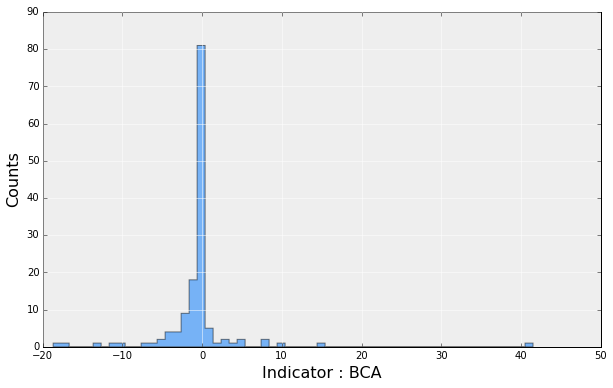

,Economic Group
count,141
mean,0
std,5
min,-18
25%,0
50%,0
75%,0
max,41


In [143]:
def aggregate_indicator_distributions():
    """
    This is a function to analyze and plot sample distributions across Economic Groups.
    Return:
    plots of distributions
    overall_dist: a dataframe containing salaries distribution stats.
    """
    
    year1 = 1980 #global parameter
    indc = 'BCA' 
    
    
    df = specific_indicator_preprocessing_by_year(indc)
    
    
    overall_dist = pd.DataFrame(df[year1].describe()) #make a dataframe containing salaries statistics information for each year
    overall_dist = overall_dist.rename(columns={year: 'Economic Group'})
    overall_dist['Economic Group'] = overall_dist['Economic Group'].apply(lambda x: int(x)) #convert all elements in dataframe to integers

    ax = df[year].hist(bins=60, histtype='stepfilled', fc='#0077FF',alpha=0.5,figsize=(10,6))
    ax.set_axis_bgcolor('#EEEEEE')
    ax.grid(color='white', linestyle='solid')
    ax.set_xlabel('Indicator : {}'.format(indc), fontsize=16)
    ax.set_ylabel('Counts', fontsize=16)
    plt.show()
    
    return overall_dist

aggregate_indicator_distributions()

In [159]:
indc = 'BCA'

df = specific_indicator_preprocessing_by_year(indc) 
df = df.reset_index(1)
df = df.groupby(by='Economic Group')
df.mean()
df

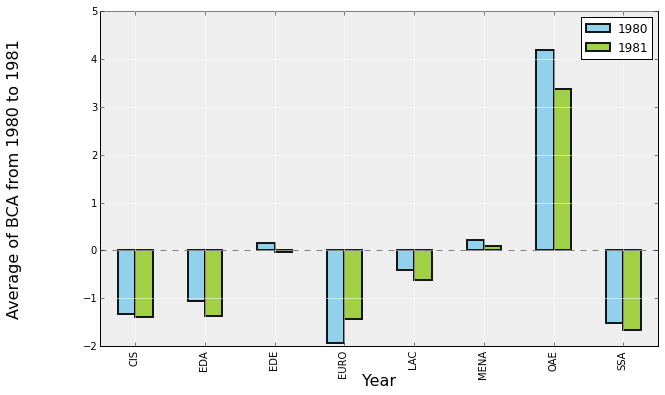

In [163]:
def economic_group_trend():
    """
    This is a function to analyze and plot indicator trend by Economic Group over time.

    Return:
    plot of mean data
    """
    
    year1 = 1980 #global parameter
    year2 = 1981
    indc = 'BCA' 

    df = specific_indicator_preprocessing_by_year(indc)
    
    df = df.reset_index(1)
    df = df.groupby(by='Economic Group').mean()

    ax = df.plot(kind = 'bar', color=['skyblue', 'yellowgreen'], linewidth = 2.0, alpha=0.9, figsize=(10,6))
    ax.grid(color='white', linestyle='solid')
    ax.set_axis_bgcolor('#EEEEEE')
    ax.set_xlabel('Year', fontsize=16)
    ax.set_ylabel('Average of {} from {} to {}'.format(indc,year1,year2), fontsize=16)
    ax.xaxis.set_label_coords(0.5,-0.08)
    ax.yaxis.set_label_coords(-0.14,0.5)
    plt.show()
    
    return

economic_group_trend()

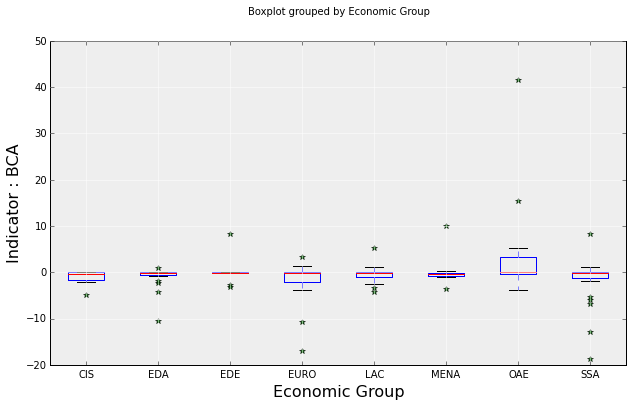

,CIS,EDA,EDE,EURO,LAC,MENA,OAE,SSA
count,6,20,10,17,26,12,15,35
mean,-1,-1,0,-1,0,0,4,-1
std,1,2,3,4,1,3,11,4
min,-4,-10,-3,-16,-4,-3,-3,-18
25%,-1,0,0,-2,-1,0,0,-1
50%,0,0,0,0,0,0,0,0
75%,0,0,0,0,0,0,3,0
max,0,0,8,3,5,10,41,8


In [187]:
def pos_salaries_distribution():
    """
    This is a function to analyze and plot indicator distributions by Economic Group.

    Return:
    html: a string of html of by-position salaries distribution plot.
    pos: a dataframe with salaries statistics by positions.
    """
    
    year1 = 1980 #global parameter
    indc = 'BCA' 

    df = specific_indicator_preprocessing_by_year(indc)
    df = df.reset_index(1)
        
    df = df[[year1,'Economic Group']].dropna()
    econ_groups = ['CIS', 'EDA', 'EDE', 'EURO', 'LAC', 'MENA', 'OAE', 'SSA']
    
    df = df[df['Economic Group'].isin(econ_groups)]
    groups = [df[df['Economic Group'] == group].describe().rename(columns={year:group}) for group in econ_groups] #store by-position salaries statistics into a list
    groups = pd.concat(groups, axis=1) #merge all by-position dataframes
    
    #convert all elements in dataframe into integers
    for group in econ_groups:
        groups[group] = groups[group].apply(lambda x: int(x))

    ax = df.boxplot(by='Economic Group',sym='g*',figsize=(10,6))
    ax.set_axis_bgcolor('#EEEEEE')
    ax.grid(color='white', linestyle='solid')

    #add positions name text into the boxplot
    loc = df.groupby('Economic Group').median()
    plt.title('')
    ax.set_xlabel('Economic Group', fontsize=16)
    ax.set_ylabel('Indicator : {}'.format(indc), fontsize=16)
    plt.show()
    return groups

pos_salaries_distribution()